<a href="https://colab.research.google.com/github/KurniawatiAgustina/Pembelajaran-Mesin/blob/main/UTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama : Kurniawati Agustina**

**Kelas : 3A**

**No Absn : 15**

# **Midterm Clustering Challenge**

**What To Do**

Based on the case presentation, you are asked to,

1. Select 5 license plate images for each group member from the dataset provided.
2. Segment the number plate image to clarify the characters on the number plate.
3. You can use the K-Means algorithm as explained in the previous practicum or use another clustering algorithm.
4. You are allowed to carry out data preprocessing on the image such as,
* Change the color space
* Dimensional reduction
* etc
5. Show image comparison between before and after segmentation

**Open Challenge**

How to evaluate segmentation results?
Apply to this case!
Notes:

The image loading process is exemplified using the OpenCV library
By default, openCV will load images in BGR format

**Library**

In [ ]:
import os
import cv2
import random
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

**Penjelasan Kode Program**

Kode program di atas adalah program Python yang mengimpor berbagai modul dan pustaka yang dibutuhkan untuk melakukan analisis citra dan pemrosesan data, termasuk OpenCV, pengelompokan K-Means, PCA, dan pengolahan data dengan Skaler MinMax. Kode ini merupakan bagian dari program yang lebih besar yang akan melakukan analisis pengelompokan warna dan reduksi dimensi pada gambar.

In [ ]:
# Ubah 'nama_file_citra.jpg' menjadi path lengkap di Google Drive
path_to_image = '/content/drive/MyDrive/dummpy'

# Load citra plat nomor
image = cv2.imread(path_to_image)

**Penjelasan Kode Program **

Kode program di atas adalah dua pernyataan yang melakukan hal berikut:

1. `path_to_image` adalah variabel yang berisi jalur lengkap menuju citra plat nomor yang akan dimuat. Jalur ini adalah jalur di Google Drive dalam direktori '/content/drive/MyDrive/dummy'. Jadi, kode ini menetapkan jalur citra ke variabel `path_to_image`.

2. `cv2.imread(path_to_image)` adalah perintah yang menggunakan OpenCV (modul pengolahan citra) untuk memuat citra plat nomor dari jalur yang telah ditetapkan dalam variabel `path_to_image`.

**Display the Images**

In [ ]:
# Fungsi untuk menampilkan citra
def show_images(images, titles, figsize=(15, 7)):
    plt.figure(figsize=figsize)
    for i in range(len(images)):
        plt.subplot(1, len(images), i+1)
        plt.imshow(images[i])
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

**KMeans Modelling**

In [ ]:
def kmeans_segmentation(image, k):
    # Jika citra berwarna
    if len(image.shape) == 3:
        pixels = image.reshape((-1, 3))
    # Jika citra grayscale
    elif len(image.shape) == 2:
        pixels = image.reshape((-1, 1))
    else:
        raise ValueError("Bentuk citra tidak didukung")

    kmeans = KMeans(n_clusters=k, n_init=100)
    kmeans.fit(pixels)

    # Gunakan dimensi citra asli
    segmented_image = kmeans.labels_.reshape(image.shape[:2])
    return segmented_image

**Read Image**

In [ ]:
import os
import random

# Direktori dataset
dataset_dir = '/content/drive/MyDrive/dummy'  # Ubah menjadi direktori yang sesuai

# Pilih semua citra plat nomor dari seluruh dataset
all_image_files = []
for root, dirs, files in os.walk(dataset_dir):
    all_image_files.extend([os.path.join(root, file) for file in files])

# Pastikan ada cukup citra untuk diambil
if len(all_image_files) >= 5:
    # Pilih secara acak 5 citra plat nomor
    selected_images = random.sample(all_image_files, 5)
else:
    print("Tidak cukup citra dalam dataset untuk mengambil sampel 5 citra.")


**Cetak Data Citra**

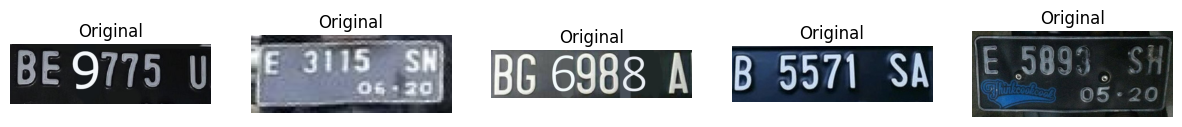

In [ ]:
# Muat dan tampilkan citra-citra yang dipilih sebelum segmentasi
original_images = [cv2.imread(img) for img in selected_images]

# Menampilkan citra asli dengan judul "Original" (dalam format RGB)
fig, axes = plt.subplots(1, len(original_images), figsize=(15, 5))
for ax, image in zip(axes, original_images):
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    ax.imshow(rgb_image)
    ax.set_title('Original')
    ax.axis('off')
plt.show()

**Pre-Processing**

In [ ]:
# Pra-pemrosesan: Merubah color space menjadi grayscale
grayscale_images = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in original_images]

# Pra-pemrosesan: Reduksi dimensi menggunakan PCA
pca = PCA(n_components=3)
reduced_images = [pca.fit_transform(img.reshape((-1, 3))).reshape(img.shape) for img in original_images]

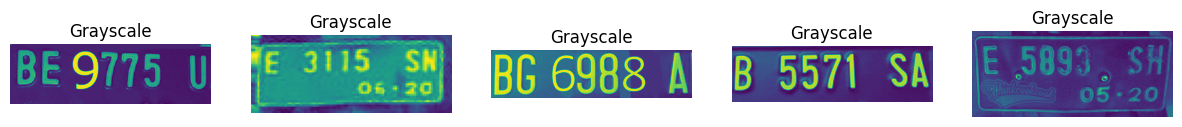

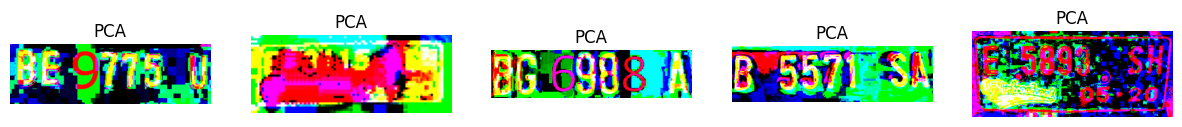

In [ ]:
show_images(grayscale_images, titles=['Grayscale']*len(grayscale_images))
show_images(reduced_images, titles=['PCA']*len(reduced_images))

**Proses Segmentasi**

In [ ]:
# Lakukan segmentasi pada citra-citra yang telah di-preprocess
segmented_images_gray = [kmeans_segmentation(img, 2) for img in grayscale_images]

**Hasil Segementasi**

In [ ]:
# Pra-pemrosesan: Reduksi dimensi menggunakan PCA
pca = PCA(n_components=3)
reduced_images = [pca.fit_transform(img.reshape((-1, 3))).reshape(img.shape) for img in original_images]

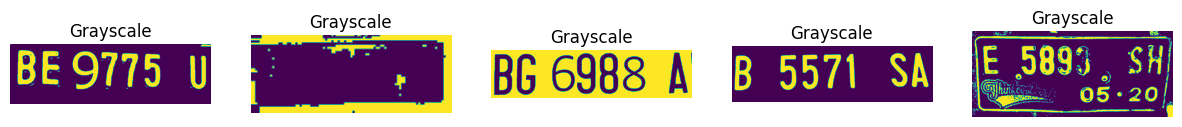

In [ ]:
# Tampilkan perbandingan citra sebelum dan sesudah segmentasi
show_images(segmented_images_gray,['Grayscale']*len(segmented_images_gray))